In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Particle Swarm Optimization

In [2]:
class PSO():
    def __init__(self, num_dims, num_individuals, num_gens, lower_bound, upper_bound, accel):
        self.num_dims = num_dims
        self.num_individuals = num_individuals
        self.num_gens = num_gens
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.accel = accel
        
    def init_pop(self, num_individuals):
        population = []
        for index in range(self.num_individuals):
            coefficents = np.random.uniform(0, 1, size = self.num_dims)
            indiv = [coefficent* (self.upper_bound - self.lower_bound) + self.lower_bound \
                   for coefficent in coefficents]
            population.append(np.array(indiv))
        return population
        
    def fitness(self, indiv):
        score = 0
        for index in range(self.num_dims - 1):
            score += 100*(indiv[index + 1] - indiv[index]**2)**2 + (indiv[index] - 1)**2
        return score
    
    def init_velocity(self, num_individuals):
        velocities = []
        for index in range(self.num_individuals):
            velocity = np.zeros(self.num_dims)
            velocities.append(velocity)
        return velocities
    
    def select_best_indi(self, population):
        best_fitness, best_indi = float('inf'), None
        for indi in population:
            if self.fitness(indi) < best_fitness:
                best_fitness = self.fitness(indi)
                best_indi = indi
        return best_fitness, best_indi
    
    def evolve(self):
        history = []
        generation, population = 0, self.init_pop(self.num_individuals)
        velocities = self.init_velocity(self.num_individuals)
        best_positions = [indi.copy() for indi in population]  # Make a copy of the initial positions
        best_fitness, best_indi = self.select_best_indi(population)

        while generation < self.num_gens:
            for index, indi in enumerate(population):
                rand = np.random.random(size=2)
                velocities[index] = velocities[index] + self.accel[0] * rand[0] * (best_positions[index] - indi) \
                                    + self.accel[1] * rand[1] * (best_indi - indi)
                population[index] = indi + velocities[index]
                # Update position with bounds checking
                for dim in range(self.num_dims):
                    if population[index][dim] > self.upper_bound:
                        population[index][dim] = self.upper_bound
                    elif population[index][dim] < self.lower_bound:
                        population[index][dim] = self.lower_bound

                # Update best_positions and best_fitness if necessary
                if self.fitness(population[index]) < self.fitness(best_positions[index]):
                    best_positions[index] = population[index]

                if self.fitness(population[index]) < best_fitness:
                    best_fitness = self.fitness(population[index])
                    best_indi = population[index]

            if generation % 50 == 0:
                print("Generation {}, best fitness is {}".format(generation + 1, best_fitness))

            history.append(best_fitness)
            generation += 1

        return history

In [3]:
pso = PSO(num_dims = 20, 
          num_individuals = 100,
          num_gens = 1500,
          lower_bound = -5,
          upper_bound = 10,
          accel = np.array([1, 1]))
history_pso = pso.evolve()

Generation 1, best fitness is 22183.067983693763
Generation 51, best fitness is 3972.4326498741852
Generation 101, best fitness is 3498.0592684916223
Generation 151, best fitness is 1074.3311395871017
Generation 201, best fitness is 1018.9354234879698
Generation 251, best fitness is 838.0637026306699
Generation 301, best fitness is 713.2592074934761
Generation 351, best fitness is 543.2412232403184
Generation 401, best fitness is 505.1797126231816
Generation 451, best fitness is 505.1797126231816
Generation 501, best fitness is 505.1797126231816
Generation 551, best fitness is 438.14310244247224
Generation 601, best fitness is 427.4524258245087
Generation 651, best fitness is 351.131415850827
Generation 701, best fitness is 331.0036554672461
Generation 751, best fitness is 331.0036554672461
Generation 801, best fitness is 294.3880460486855
Generation 851, best fitness is 188.06007726140993
Generation 901, best fitness is 188.06007726140993
Generation 951, best fitness is 188.0600772614

# DE and PSO

In [6]:
class DE_PSO():
    def __init__(self, num_dims, num_individuals, num_gens, lower_bound, upper_bound, accel, crossover_rate):
        self.num_dims = num_dims
        self.num_individuals = num_individuals
        self.num_gens = num_gens
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.accel = accel
        self.crossover_rate = crossover_rate
        
    def fitness(self, indiv):
        score = 0
        for index in range(self.num_dims - 1):
            score += 100*(indiv[index + 1] - indiv[index]**2)**2 + (indiv[index] - 1)**2
        return score
        
    def init_pop(self, num_individuals):
        population = []
        for index in range(self.num_individuals):
            coefficents = np.random.uniform(0, 1, size = self.num_dims)
            indiv = [coefficent* (self.upper_bound - self.lower_bound) + self.lower_bound \
                   for coefficent in coefficents]
            population.append(np.array(indiv))
        return population
    
    def init_velocity(self, num_individuals):
        velocities = []
        for index in range(self.num_individuals):
            velocity = np.zeros(self.num_dims)
            velocities.append(velocity)
        return velocities
    
    def select_best_indi(self, population):
        best_fitness, best_indi = float('inf'), None
        for indi in population:
            if self.fitness(indi) < best_fitness:
                best_fitness = self.fitness(indi)
                best_indi = indi
        return best_fitness, best_indi
    
    def evolve(self):
        history = []
        generation, population = 0, self.init_pop(self.num_individuals)
        velocities = self.init_velocity(self.num_individuals)
        best_positions = population.copy()  
        best_fitness, best_indi = self.select_best_indi(population)
        while generation < self.num_gens:
            if generation % 2 == 0:
                for index, indi in enumerate(population):
                    rand = np.random.random(size = 2)
                    velocities[index] = velocities[index] + self.accel[0]* rand[0]*(best_positions[index] - indi) \
                                                        + self.accel[1]*rand[1]*(best_indi - indi)
                    population[index] = population[index] + velocities[index]
                    for dim in range(self.num_dims):
                        if population[index][dim] > self.upper_bound:
                            population[index][dim] = self.upper_bound
                        elif population[index][dim] < self.lower_bound:
                            population[index][dim] = self.lower_bound
                    
                    if self.fitness(population[index]) < self.fitness(indi):
                        best_positions[index] = population[index]
                    if self.fitness(population[index]) < best_fitness:
                        best_fitness = self.fitness(population[index])
                        best_indi = population[index]
            else:
                for index, indi in enumerate(population):
                    rand = np.random.choice(self.num_individuals, size = 3, replace = False)
                    scale = np.random.uniform(0, 2)
                    mutation = population[rand[0]] + scale* (population[rand[1]] - population[rand[2]])
                    for dim in range(self.num_dims):
                        if mutation[dim] > self.upper_bound:
                            mutation[dim] = self.upper_bound
                        elif mutation[dim] < self.lower_bound:
                            mutation[dim] = self.lower_bound
                    ran_dim = np.random.choice(self.num_individuals)
                    indi_after = []
                    for dim in range(self.num_dims):
                        if random.random() < self.crossover_rate or dim == ran_dim:
                            indi_after.append(mutation[dim])
                        else:
                            indi_after.append(indi[dim])
                    indi_after = np.array(indi_after)
                    if self.fitness(indi_after) < self.fitness(indi):
                        population[index] = indi_after
                        best_positions[index] = population[index]
                        
                        if self.fitness(population[index]) < best_fitness:
                            best_fitness = self.fitness(population[index])
                            best_indi = population[index]
            history.append(best_fitness)
            if generation % 50 == 0:
                print("Generation {}, best fitness is {}".format(generation + 1, best_fitness))
            generation += 1
        return history

In [8]:
de_pso = DE_PSO(num_dims = 20,
                num_individuals = 100,
                num_gens = 1500,
                lower_bound = -5,
                upper_bound = 10,
                accel = np.array([1, 1]),
                crossover_rate = 0.8)
history_pso_de = de_pso.evolve()

Generation 1, best fitness is 39461.22629028312
Generation 51, best fitness is 652.608699051528
Generation 101, best fitness is 176.8649367376182
Generation 151, best fitness is 68.13578090921163
Generation 201, best fitness is 10.8187448199699
Generation 251, best fitness is 5.260220544049268
Generation 301, best fitness is 3.715823472630841
Generation 351, best fitness is 3.560726953456584
Generation 401, best fitness is 3.528320949707393
Generation 451, best fitness is 3.4006898941459385
Generation 501, best fitness is 1.3067244179867141
Generation 551, best fitness is 0.5355023348916486
Generation 601, best fitness is 0.28376655746552804
Generation 651, best fitness is 0.038054054192409495
Generation 701, best fitness is 0.008241011670661925
Generation 751, best fitness is 0.0009038683211416823
Generation 801, best fitness is 0.0001615970450481627
Generation 851, best fitness is 4.135690457609474e-05
Generation 901, best fitness is 8.645780896016086e-06
Generation 951, best fitness

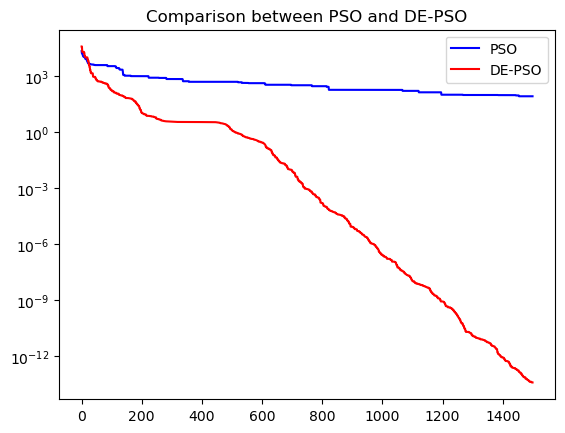

In [12]:
plt.title("Comparison between PSO and DE-PSO")
plt.plot(history_pso, color = "blue", label = "PSO")
plt.plot(history_pso_de, color = "red", label = "DE-PSO")
plt.legend()
plt.yscale('log')